c:\Users\LENOVO\Documents\GitHub\Elevator\AIBuilder-LatticeBoltzmann\simulation.py:52: RuntimeWarning: invalid value encountered in divide
  self.speedY = self.momentumY / self.density
c:\Users\LENOVO\Documents\GitHub\Elevator\AIBuilder-LatticeBoltzmann\simulation.py:53: RuntimeWarning: invalid value encountered in divide
  self.speedX = self.momentumX / self.density


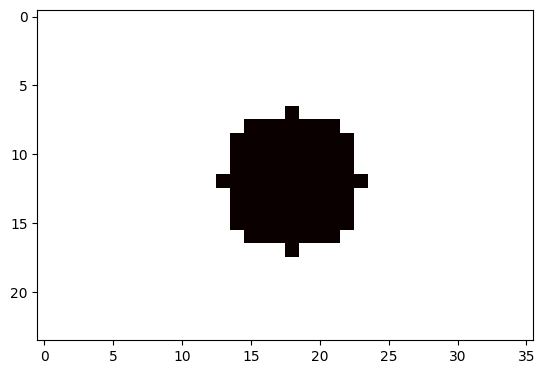

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import itertools as itr
import copy
from boundaries import WallBoundary, PressureBoundary, VelocityBoundary
from generators import WallGenerators
from simulation import Simulation
import random

# np.seterr(divide=None, invalid=None)  # For suppressing warnings. Totally optional.

yResolution = 24
xResolution = 36
initCondition = np.ones((yResolution, xResolution, Simulation.latticeSize)) / 9
walls = WallBoundary(yResolution, xResolution)
# walls.borderWall()
walls.cylindricalWall([12, 18], 5)
velocityInlet = [] # [VelocityBoundary(12, 2, 1, 1)]
pressureInlet = [PressureBoundary(12, 2, 1, 0, 1)]

simulation = Simulation(
    yResolution, xResolution, initCondition, walls, velocityBoundaries=velocityInlet, pressureBoundaries=pressureInlet
)

plt.imshow(simulation.density, cmap="hot", interpolation="nearest")

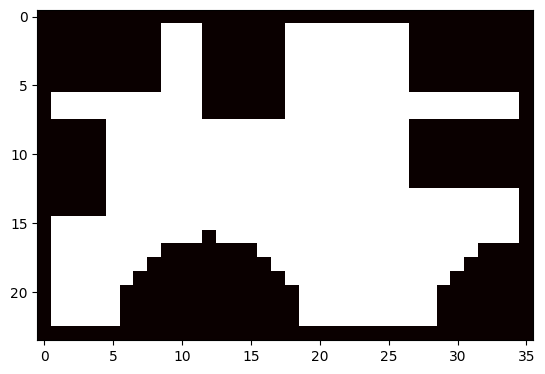

In [2]:
yResolution = 24
xResolution = 36
initCondition = np.ones((yResolution, xResolution, Simulation.latticeSize)) / 9
walls = WallBoundary(yResolution, xResolution)
# walls.borderWall()

for i in random.sample(range(8), k = random.randint(1,8)):
    
    possiblePositions = [(int(yResolution/3), xResolution - 1), (0, int(xResolution/3)), (int(yResolution/3), 0), (yResolution - 1, int(xResolution/3)), (0, xResolution - 1), (0, 0), (yResolution - 1, 0), (yResolution - 1, xResolution - 1)]

    wallPos = possiblePositions[i]
    maxSize = int(min(yResolution, xResolution) * 0.4)
    minSize = int(min(yResolution, xResolution) * 0.2)
    if random.random() < 0.5:
        walls.cylindricalWall(wallPos, random.randint(minSize, maxSize))
    else:
        directions = [(1,-1),(1,1),(1,1),(-1,1),(1,-1),(1,1),(-1,1),(-1,-1)]
        endPos = (wallPos[0] + (random.randint(minSize, maxSize)*directions[i][0]), wallPos[1] + (random.randint(minSize, maxSize)*directions[i][1]))
        walls.filledStraightRectangularWall(wallPos, endPos)
    #print(f"{i} {wallPos} {endPos} {directions[i]}")

walls.borderWall()

velocityInlet = [VelocityBoundary(12, 2, 1, 1)]
#pressureInlet = [PressureBoundary(12, 2, 1, 0, 1)]

simulation = Simulation(
    yResolution, xResolution, initCondition, walls, velocityBoundaries=velocityInlet, pressureBoundaries=pressureInlet
)

plt.imshow(simulation.density, cmap="hot", interpolation="nearest")

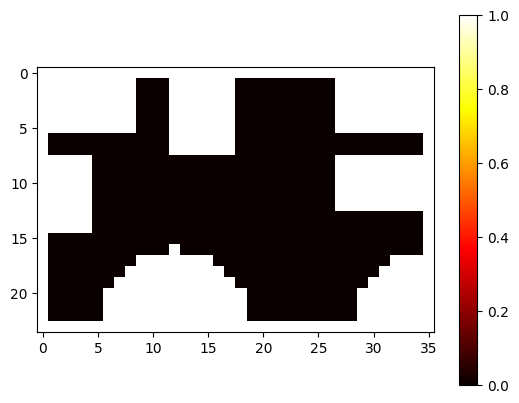

In [3]:
fig, ax = plt.subplots()
heatmap  = ax.imshow(walls.boundary, cmap="hot", interpolation="nearest")
fig.colorbar(heatmap)

In [4]:
walls.generateACPosandDirections()

[(0, 9), (0, 10), (0, 11), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (1, 8), (1, 12), (1, 17), (1, 27), (2, 8), (2, 12), (2, 17), (2, 27), (3, 8), (3, 12), (3, 17), (3, 27), (4, 8), (4, 12), (4, 17), (4, 27), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 12), (5, 17), (5, 27), (5, 28), (5, 29), (5, 30), (5, 31), (5, 32), (5, 33), (5, 34), (6, 0), (6, 12), (6, 17), (6, 35), (7, 0), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (7, 35), (8, 1), (8, 2), (8, 3), (8, 4), (8, 27), (8, 28), (8, 29), (8, 30), (8, 31), (8, 32), (8, 33), (8, 34), (9, 4), (9, 27), (10, 4), (10, 27), (11, 4), (11, 27), (12, 4), (12, 27), (12, 28), (12, 29), (12, 30), (12, 31), (12, 32), (12, 33), (12, 34), (13, 4), (13, 35), (14, 1), (14, 2), (14, 3), (14, 4), (14, 35), (15, 0), (15, 35), (16, 0), (16, 12), (16, 35), (17, 0), (17, 9), (17, 10), (17, 11), (17, 12), (17, 13), (17, 14), (17, 15), (17, 32), (17, 33), (17, 34), (18, 0), (18, 8), (18, 

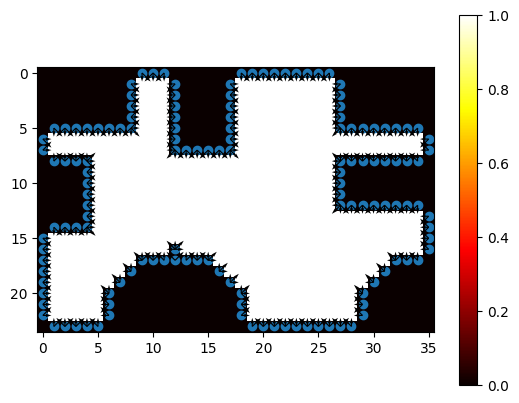

In [38]:
#walls.possibleACPos
fig, ax = plt.subplots()
heatmap  = ax.imshow(walls.invertedBoundary, cmap="hot", interpolation="nearest")
fig.colorbar(heatmap)
ax.scatter([i[1] for i in walls.possibleACPos], [i[0] for i in walls.possibleACPos])
print(walls.possibleACPos)
print(walls.possibleACDirections)

outPutDirectionsY = np.array([WallBoundary.unitVect[j][0] for i in walls.possibleACDirections for j in i])
outPutDirectionsX = np.array([WallBoundary.unitVect[j][1] for i in walls.possibleACDirections for j in i])
outPutPositionsX = [i[0] for index, i in enumerate(walls.possibleACPos) for j in range(len(walls.possibleACDirections[index]))]
outPutPositionsY = [i[1] for index, i in enumerate(walls.possibleACPos) for j in range(len(walls.possibleACDirections[index]))]
quivermap = ax.quiver(outPutPositionsY, outPutPositionsX, 310*outPutDirectionsX, -310*outPutDirectionsY)

[(0, 9), (0, 10), (0, 11), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (1, 8), (1, 12), (1, 17), (1, 27), (2, 8), (2, 12), (2, 17), (2, 27), (3, 8), (3, 12), (3, 17), (3, 27), (4, 8), (4, 12), (4, 17), (4, 27), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 12), (5, 17), (5, 27), (5, 28), (5, 29), (5, 30), (5, 31), (5, 32), (5, 33), (5, 34), (6, 0), (6, 12), (6, 17), (6, 35), (7, 0), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (7, 35), (8, 1), (8, 2), (8, 3), (8, 4), (8, 27), (8, 28), (8, 29), (8, 30), (8, 31), (8, 32), (8, 33), (8, 34), (9, 4), (9, 27), (10, 4), (10, 27), (11, 4), (11, 27), (12, 4), (12, 27), (12, 28), (12, 29), (12, 30), (12, 31), (12, 32), (12, 33), (12, 34), (13, 4), (13, 35), (14, 1), (14, 2), (14, 3), (14, 4), (14, 35), (15, 0), (15, 35), (16, 0), (16, 12), (16, 35), (17, 0), (17, 9), (17, 10), (17, 11), (17, 12), (17, 13), (17, 14), (17, 15), (17, 32), (17, 33), (17, 34), (18, 0), (18, 8), (18, 

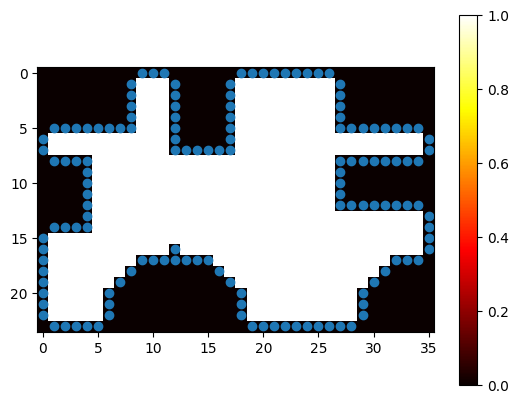

In [6]:
walls.boundaryIndex
walls.boundary
from scipy.ndimage import convolve
def numerical_inverse(n):
    return int(n != 1)

applyall = np.vectorize(numerical_inverse)
inverted = applyall(walls.boundary.astype(int))
#print(inverted)
#plt.imshow(inverted, cmap="hot", interpolation="nearest")
padded_array = np.pad(inverted, pad_width=1, mode='constant', constant_values=0)
kernel = [[1,1,1],[1,0,1],[1,1,1]]
edgeMinesweeper = convolve(padded_array, kernel)[1:-1, 1:-1] 
edgesProcessed = np.logical_and(edgeMinesweeper >= 2, edgeMinesweeper <= 5)

edges = []
edgesX = []
edgesY = []
for i in walls.boundaryIndex:
    if (edgesProcessed[i[0], i[1]]):
        edges.append((i[0], i[1]))
        edgesX.append(i[0])
        edgesY.append(i[1])

print(edges)
fig, ax = plt.subplots()
heatmap  = ax.imshow(inverted, cmap="hot", interpolation="nearest")
fig.colorbar(heatmap)
ax.scatter(edgesY, edgesX)

In [7]:
from scipy.ndimage import convolve

def numerical_inverse(n):
    return int(n != 1)

data = np.array([[1,1,1,1],[1,0,0,1],[1,0,0,1],[1,1,1,1]])

applyall = np.vectorize(numerical_inverse)
inverted = applyall(data)
print(inverted)

padded_array = np.pad(inverted, pad_width=1, mode='constant', constant_values=0)
kernel = [[1,1,1],[1,0,1],[1,1,1]]



print(convolve(padded_array, kernel)[1:-1, 1:-1])

[[0 0 0 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 0 0 0]]
[[1 2 2 1]
 [2 3 3 2]
 [2 3 3 2]
 [1 2 2 1]]


In [8]:
simulation.simulate(step = 10)
print(simulation.isAtDensityEquilibirum(1.9))

densityPlot = copy.copy(simulation.density)
densityPlot[walls.invertedBoundary] -= np.min(densityPlot[walls.invertedBoundary])

fig, ax = plt.subplots()
heatmap = ax.imshow(densityPlot, cmap = "rainbow", interpolation = "nearest")
quivermap = ax.quiver(simulation.xIndex, simulation.yIndex, simulation.momentumX, -simulation.momentumY)
fig.colorbar(heatmap)
# print(simulation.fluid)
plt.show()

c:\Users\LENOVO\Documents\GitHub\Elevator\AIBuilder-LatticeBoltzmann\simulation.py:69: RuntimeWarning: invalid value encountered in divide
  self.speedY = self.momentumY / self.density
c:\Users\LENOVO\Documents\GitHub\Elevator\AIBuilder-LatticeBoltzmann\simulation.py:70: RuntimeWarning: invalid value encountered in divide
  self.speedX = self.momentumX / self.density


IndexError: index 36 is out of bounds for axis 1 with size 36